In [1]:
import pickle
import os
import sys
import pandas as pd
import yfinance as yf
import numpy as np
sys.path.append(os.path.join('ML_additoinal_files'))

from config import *
from helper import *
from model import *

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import warnings

import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from time import time


warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
pd.options.mode.chained_assignment = None 

# Collect data and calculate momentum statistics

In [2]:
price_data_df = collecting_data(START_DATE, END_DATE, DATA_OPEN_LOC, DATA_CLOSE_LOC, DATA_HIGH_LOC, DATA_LOW_LOC, DATA_VOL_LOC, DATA_DIV_LOC)
relative_df = get_relative(price_data_df)
risk_free_rate_list = get_risk_free_rate(START_DATE, END_DATE)
risk_free_rate = float(risk_free_rate_list.mean())
open_positions, _ = momentum_strategy_stat(price_data_df, relative_df)
features_dict = calc_variability_per_stocks(price_data_df, open_positions, risk_free_rate, GROUP_LABELS)

[*********************100%***********************]  1 of 1 completed


# Split Train/Test dataset

Stocks marked as Winners
Winners Data
Train length: (6383, 23), Test length: (2736, 23)


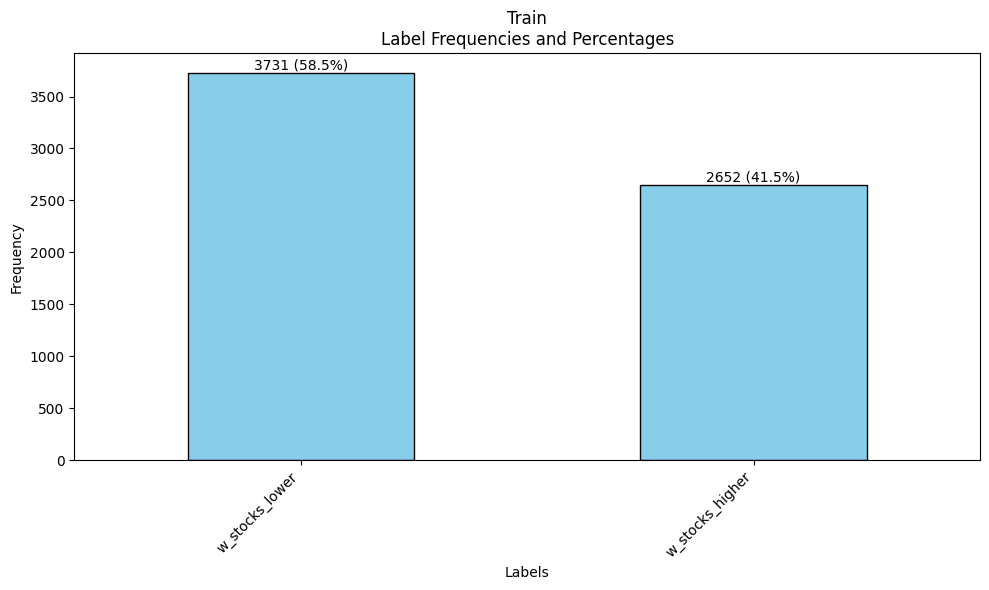

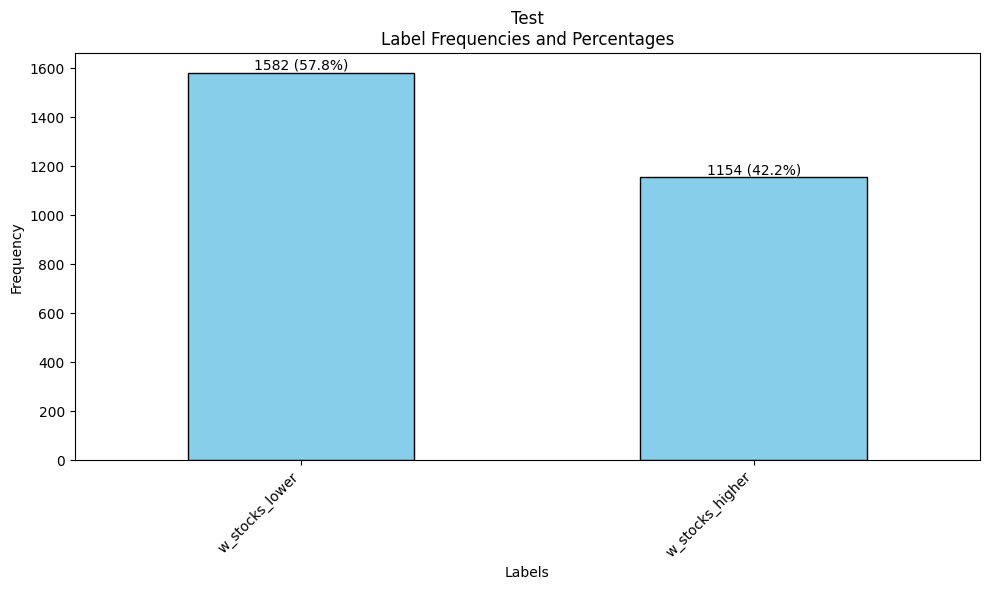

In [3]:
df = pd.DataFrame(features_dict).T
df = df[~df.isin([float('inf'), float('-inf')]).any(axis=1)]

print('Stocks marked as Winners')
df_w = df[df['label'].isin([GROUP_LABELS['w_stocks_higher'],GROUP_LABELS['w_stocks_lower']])]
train_range = int(len(df_w) * TRAIN_SPLIT)
w_train_df, w_test_df = split_train_test(df_w, train_range, 'Winners')

Stocks marked as losers
Losers Data
Train length: (6383, 23), Test length: (2736, 23)


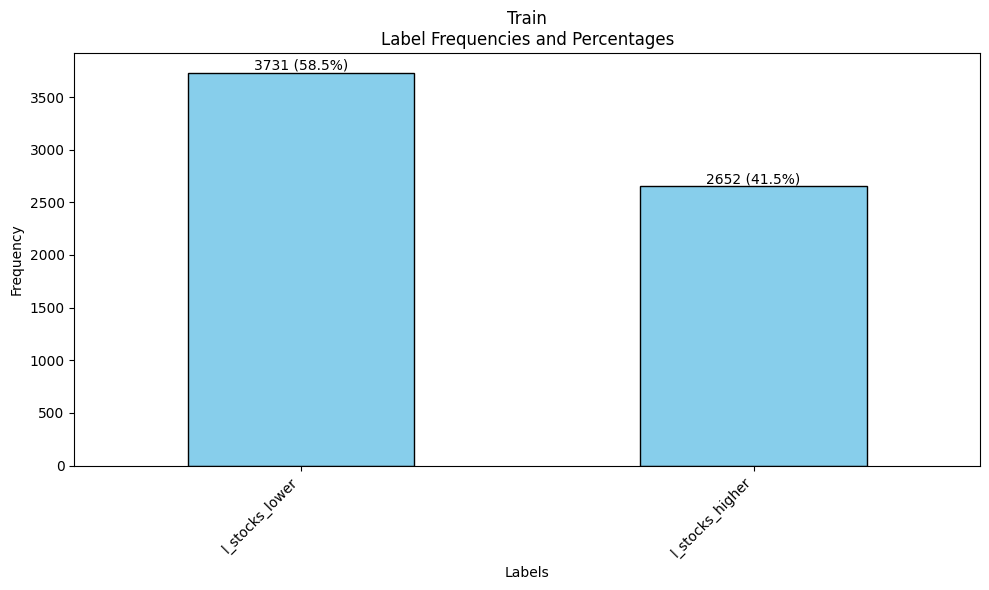

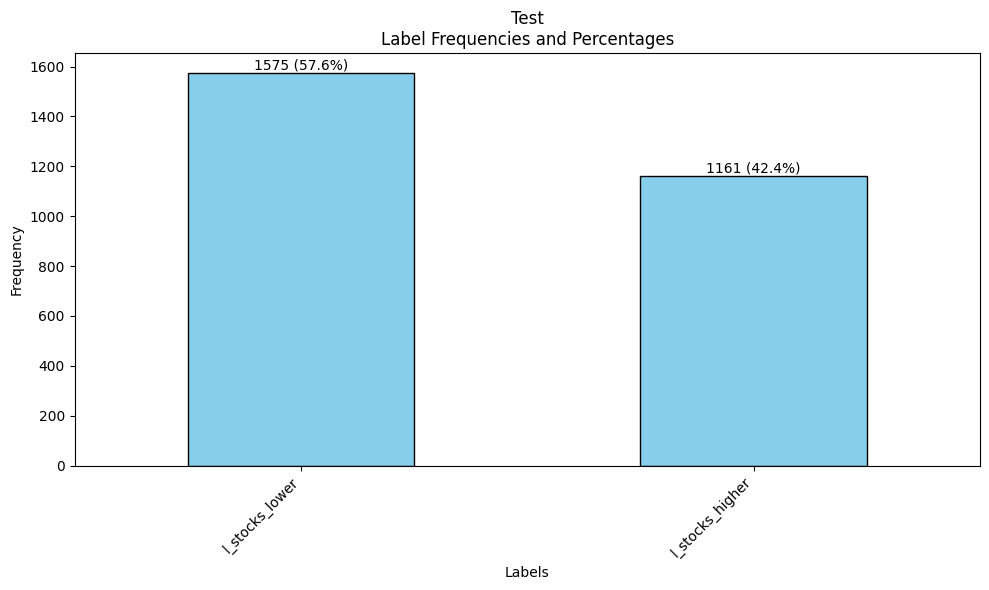

In [4]:
print('Stocks marked as losers')
df_l = df[df['label'].isin([GROUP_LABELS['l_stocks_higher'],GROUP_LABELS['l_stocks_lower']])]
train_range = int(len(df_l) * TRAIN_SPLIT)
l_train_df, l_test_df = split_train_test(df_l, train_range, 'Losers')

# Train buying ans selling model

In [5]:
w_cv_stat_df, w_model, w_f_importance = train_model(w_train_df)
l_cv_stat_df, l_model, l_f_importance = train_model(l_train_df)

train_df: (6383, 20)
GridSearchCV time(mintues): 4.93
train_df: (6383, 20)
GridSearchCV time(mintues): 4.96


# Analyse the model

In [6]:
w_cv_stat_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.273475      0.096876         0.009498        0.000533   
1       2.571916      0.145364         0.016580        0.002680   
2       2.265745      0.116728         0.012933        0.001088   
3       4.577988      0.148555         0.023138        0.001246   
4       0.660326      0.019472         0.005250        0.000495   
5       5.456383      0.237304         0.004557        0.000340   
6       1.197403      0.049378         0.005471        0.000359   
7      10.727007      0.240345         0.005227        0.000217   

               param_classifier param_classifier__class_weight  \
0      RandomForestClassifier()                       balanced   
1      RandomForestClassifier()                       balanced   
2      RandomForestClassifier()                       balanced   
3      RandomForestClassifier()                       balanced   
4  GradientBoostingClassifier()                            NaN   
5  GradientBoostingClassifier()                            NaN   
6  GradientBoostingClassifier()                            NaN   
7  GradientBoostingClassifier()                            NaN   

   param_classifier__max_depth  param_classifier__min_samples_split  \
0                            5                                  2.0   
1                            5                                  2.0   
2                           10                                  2.0   
3                           10                                  2.0   
4                            3                                  NaN   
5                            3                                  NaN   
6                            3                                  NaN   
7                            3                                  NaN   

   param_classifier__n_estimators  param_classifier__random_state  ...  \
0                             100                              42  ...   
1                             200                              42  ...   
2                             100                              42  ...   
3                             200                              42  ...   
4                             100                              42  ...   
5                             100                              42  ...   
6                             200                              42  ...   
7                             200                              42  ...   

   split2_train_score  split3_train_score split4_train_score  \
0            0.657359            0.676420           0.678392   
1            0.654607            0.674415           0.683389   
2            0.838420            0.869010           0.875463   
3            0.846011            0.872475           0.882430   
4            0.537955            0.398070           0.457243   
5            0.886499            0.880574           0.878640   
6            0.537955            0.398070           0.457243   
7            0.976100            0.970003           0.976827   

   split5_train_score  split6_train_score  split7_train_score  \
0            0.677084            0.690263            0.680634   
1            0.680518            0.692150            0.686688   
2            0.880498            0.896147            0.880601   
3            0.885975            0.899290            0.886194   
4            0.524960            0.312676            0.466169   
5            0.869556            0.879220            0.882364   
6            0.524960            0.312676            0.466169   
7            0.967723            0.969149            0.971404   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0            0.687862            0.680348          0.679581         0.008559  
1            0.684447            0.680252          0.679358         0.009582  
2            0.867317            0.888744          0.874357         0.014713  
3            0.872

In [7]:
l_cv_stat_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.240417      0.046080         0.011397        0.004961   
1       2.533536      0.166767         0.014714        0.000941   
2       2.125935      0.052071         0.011828        0.000405   
3       4.328198      0.252392         0.020512        0.002011   
4       0.720974      0.145278         0.004909        0.000571   
5       6.167018      0.598392         0.005331        0.001305   
6       1.203891      0.085131         0.005430        0.000552   
7      10.855387      0.510287         0.005499        0.001228   

               param_classifier param_classifier__class_weight  \
0      RandomForestClassifier()                       balanced   
1      RandomForestClassifier()                       balanced   
2      RandomForestClassifier()                       balanced   
3      RandomForestClassifier()                       balanced   
4  GradientBoostingClassifier()                            NaN   
5  GradientBoostingClassifier()                            NaN   
6  GradientBoostingClassifier()                            NaN   
7  GradientBoostingClassifier()                            NaN   

   param_classifier__max_depth  param_classifier__min_samples_split  \
0                            5                                  2.0   
1                            5                                  2.0   
2                           10                                  2.0   
3                           10                                  2.0   
4                            3                                  NaN   
5                            3                                  NaN   
6                            3                                  NaN   
7                            3                                  NaN   

   param_classifier__n_estimators  param_classifier__random_state  ...  \
0                             100                              42  ...   
1                             200                              42  ...   
2                             100                              42  ...   
3                             200                              42  ...   
4                             100                              42  ...   
5                             100                              42  ...   
6                             200                              42  ...   
7                             200                              42  ...   

   split2_train_score  split3_train_score split4_train_score  \
0            0.668092            0.635412           0.648634   
1            0.669685            0.634248           0.646475   
2            0.880985            0.789952           0.836334   
3            0.880670            0.790385           0.835267   
4            0.523003            0.377412           0.507635   
5            0.878038            0.875960           0.875380   
6            0.523003            0.377412           0.507635   
7            0.972971            0.972810           0.968816   

   split5_train_score  split6_train_score  split7_train_score  \
0            0.647119            0.644950            0.649753   
1            0.637165            0.640675            0.648636   
2            0.821582            0.841695            0.827785   
3            0.827793            0.833689            0.826679   
4            0.530063            0.516978            0.458753   
5            0.874609            0.874479            0.876545   
6            0.530063            0.516978            0.458753   
7            0.969852            0.976116            0.966193   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0            0.647935            0.653924          0.649649         0.007874  
1            0.648259            0.655958          0.648604         0.009742  
2            0.853454            0.841357          0.836902         0.021985  
3            0.856

In [8]:
print('Winners')
measure_model_results(w_model, w_test_df)

print('Losers')
measure_model_results(l_model, l_test_df)

Winners
Precision: 0.5533329974399454
Recall: 0.549142883904195
f1_score: 0.549142883904195

Losers
Precision: 0.5869545634111117
Recall: 0.5547815311359601
f1_score: 0.5547815311359601



Winners


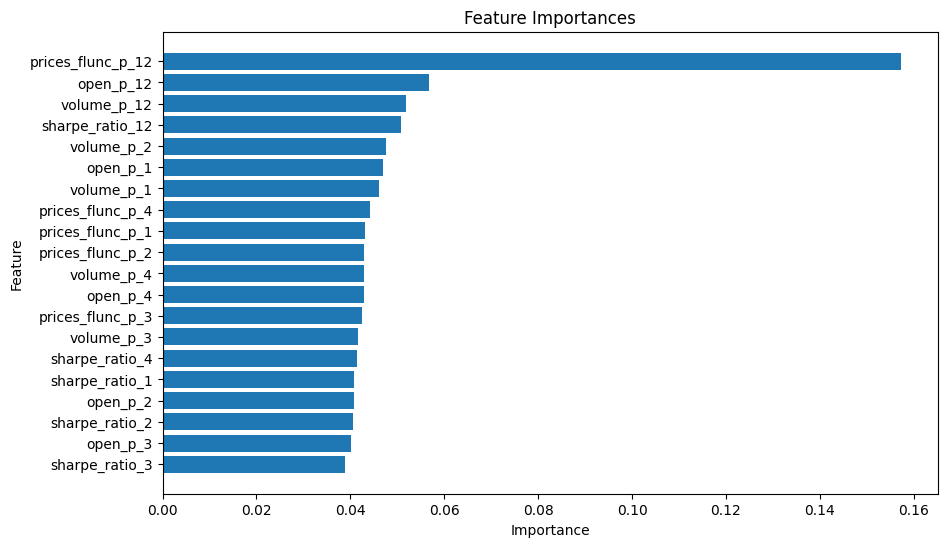

Losers


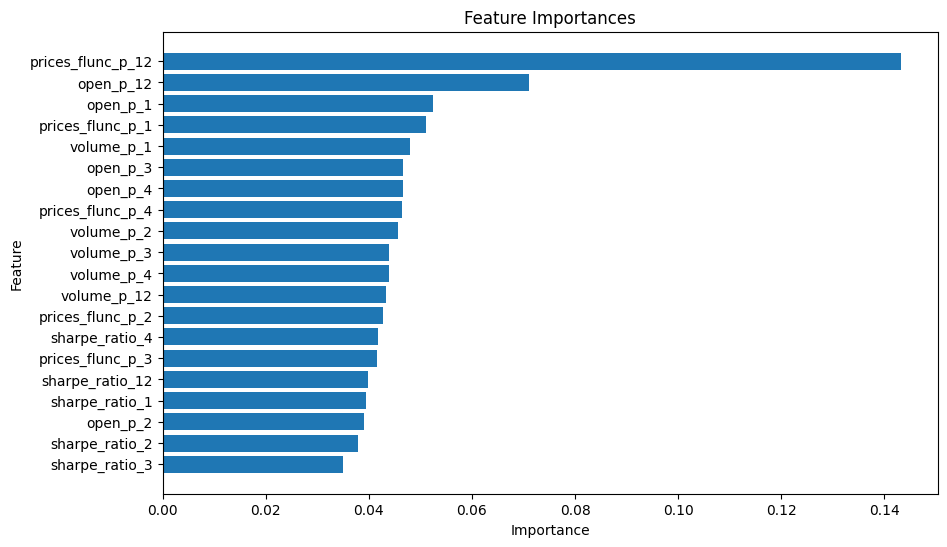

In [9]:
print_feature_importance(df, w_f_importance, 'Winners')
print_feature_importance(df, l_f_importance, 'Losers')

# Integrate the models into the enhanced momentum strategy

In [10]:
wl_test_df = pd.concat([w_test_df, l_test_df])
test_relative_df = relative_df.loc[wl_test_df['date'].unique()]

# Enhanced momentum strategy metric on the test set

In [12]:
ml_open_positions_test, ml_total_gained_valued = updated_momentum_strategy(price_data_df, test_relative_df, w_model, l_model, risk_free_rate)

avg_gain, p_value = calc_one_sided_test(ml_open_positions_test)  
print(f'Average gain:{avg_gain}. The p-value: {p_value}', 'Total gain: ', float(ml_total_gained_valued))

Average gain:-4.644919572358415. The p-value: 0.47762028224534187 Total gain:  -315.8545309203746


In [13]:
b_date, e_date = calc_profolios_dates(test_relative_df.index[0], test_relative_df.index[-1], FORMATION_PERIOD_MONTHS, HOLDING_PERIOD_MONTHS)
sp500 = yf.download('^GSPC', start=b_date, end=e_date, interval='1mo')[STOCK_TIME]
risk_free_rate = get_risk_free_rate(START_DATE, END_DATE)
sp500_returns = sp500.pct_change().dropna()

strategy_returns =  pd.Series({v['date']: v['rel_gained'] for v in ml_open_positions_test.values()}) - 1
metrics = calculate_metrics(strategy_returns, sp500_returns, risk_free_rate)

for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Annualized Return: -0.1544
Volatility: 0.2355
Sharpe Ratio: -13.2393
Max Drawdown: -0.7116
VaR 1%: -0.1764
VaR 5%: -0.1444
Alpha: -1.9588


# Original momentum strategy metric on the test set

In [14]:
mom_open_positions_test, mom_total_gained_test = momentum_strategy_stat(price_data_df, test_relative_df)

avg_gain, p_value = calc_one_sided_test(mom_open_positions_test)  
print(f'Average gain:{avg_gain}. The p-value: {p_value}', 'Total gain: ', float(mom_total_gained_test))

Average gain:-85.48202119570875. The p-value: 0.17831773943227314 Total gain:  -5812.777441308195


In [15]:
b_date, e_date = calc_profolios_dates(test_relative_df.index[0], test_relative_df.index[-1], FORMATION_PERIOD_MONTHS, HOLDING_PERIOD_MONTHS)
sp500 = yf.download('^GSPC', start=b_date, end=e_date, interval='1mo')[STOCK_TIME]
risk_free_rate = get_risk_free_rate(START_DATE, END_DATE)
sp500_returns = sp500.pct_change().dropna()

strategy_returns =  pd.Series({v['date']: v['rel_gained'] for v in mom_open_positions_test.values()}) - 1
metrics = calculate_metrics(strategy_returns, sp500_returns, risk_free_rate)

for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Annualized Return: -0.1129
Volatility: 0.1609
Sharpe Ratio: -19.1239
Max Drawdown: -0.6028
VaR 1%: -0.1051
VaR 5%: -0.0955
Alpha: -1.4653
